<a href="https://colab.research.google.com/github/AkshayKohad/ML-Tutorial/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
# Data Generation Code

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-32-76b76ec4e28e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [33]:
#Data Generate (X,Y)

def generateDataset(m):

  X = np.random.randn(m)*10
  noise  = np.random.randn(m)
  # print(X)

  #print(X.mean(),X.std())

  #Let us take some hardcoded function
  y = 3*X + 1 + 4*noise
  # now Y = 3*X + 1 is perfect dataset but in reallife there will be Y = 3*X + 1 + noise  associated with it
  # plt.scatter(X,Y)
  # plt.show()

  return (X,y)



In [34]:
X,y = generateDataset(100)
print(X.shape,y.shape)


(100,) (100,)


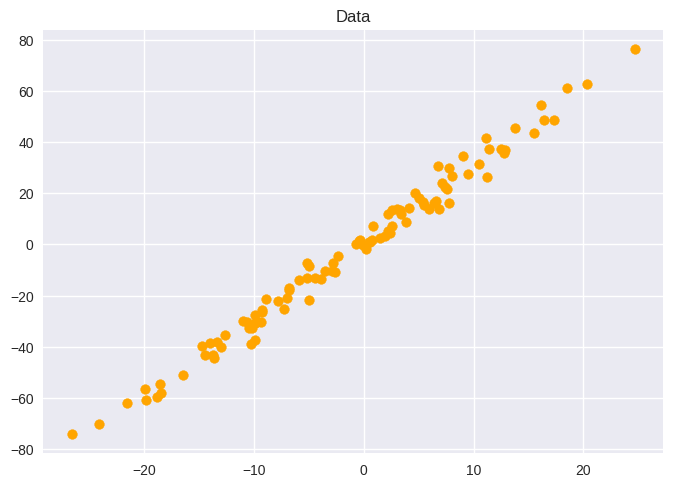

In [35]:
def plotData(X,y,color="orange",title="Data"):
  plt.title(title)

  plt.scatter(X,y,c=color)
  plt.show()

plotData(X,y)

In [36]:
# Data Normalisation

In [37]:
def normaliseData(X):
  X = (X-X.mean())/X.std()
  return X


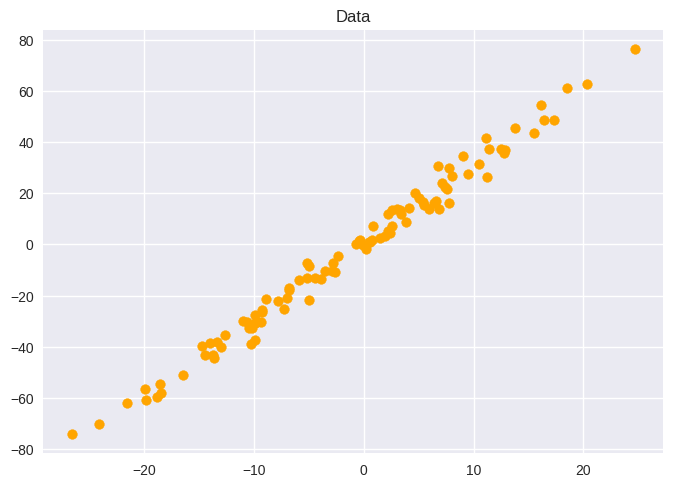

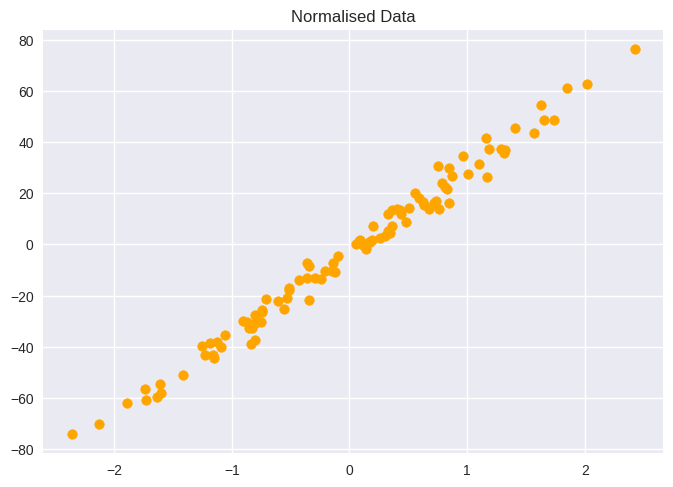

In [38]:
plotData(X,y,"orange","Data")
X = normaliseData(X)
plotData(X,y,"orange","Normalised Data")

In [39]:
# Spliting Dataset in train and test

In [40]:
def trainTestSplit(X,y,split=0.8):
  m = X.shape[0]

  data = np.zeros((m,2))

  data[:,0] = X
  data[:,1] = y

  np.random.shuffle(data)

  split = int(m*split)

  # X TRAINING
  XT = data[:split,0]

  # y TRAINING
  yT = data[:split,1]

  # X TESTING

  Xt = data[split:,0]

  # y TESTING

  yt = data[split:,1]

  return XT,yT,Xt,yt



In [41]:
XT,yT,Xt,yt = trainTestSplit(X,y)

print(XT.shape,yT.shape,Xt.shape,yt.shape)

(80,) (80,) (20,) (20,)


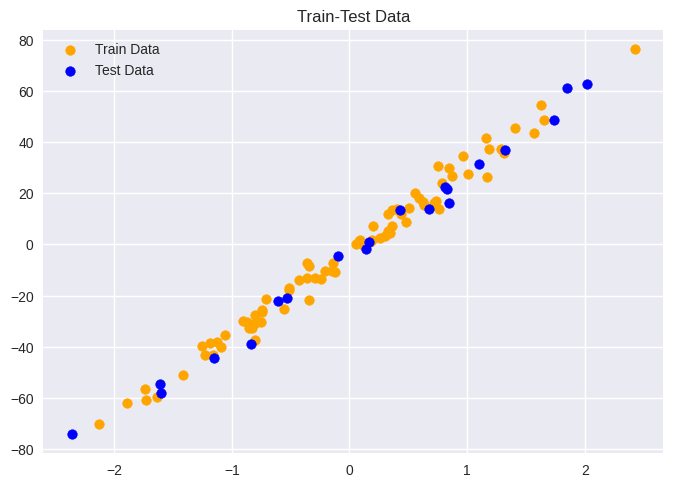

In [42]:
plt.scatter(XT,yT,color="orange",label="Train Data")
plt.scatter(Xt,yt,color="blue",label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [43]:
# Modelling


In [44]:
#Hypothesis Function
def hypothesis(X,theta):
  # h(theta) = theta(0) + theta(1)*X
  return theta[0] + theta[1]*X

 #loss function
def error(X,y,theta):

 #calculation of J(theta)
  m = X.shape[0]
  e = 0

  for i in range(m):
    y_i = hypothesis(X[i],theta)
    e = e + (y[i]-y_i)**2

  return e/(2*m)


def gradient(X,y,theta):

  m = X.shape[0]

  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(X[i],theta)-y[i]

    grad[0] = grad[0] + exp

    grad[1] = grad[1] + exp*X[i]


  return grad/m



# Training of data
def train(X,y,learning_rate=0.1,maxItrs=100):

  theta = np.zeros((2,))
  error_list = []


  for i in range(maxItrs):
    grad = gradient(X,y,theta)
    error_list.append(error(X,y,theta))

    theta[0] = theta[0] - learning_rate*grad[0]
    theta[1] = theta[1] - learning_rate*grad[1]

  plt.xlabel("Number of Iterations")
  plt.ylabel("Loss")
  plt.plot(error_list)
  return theta





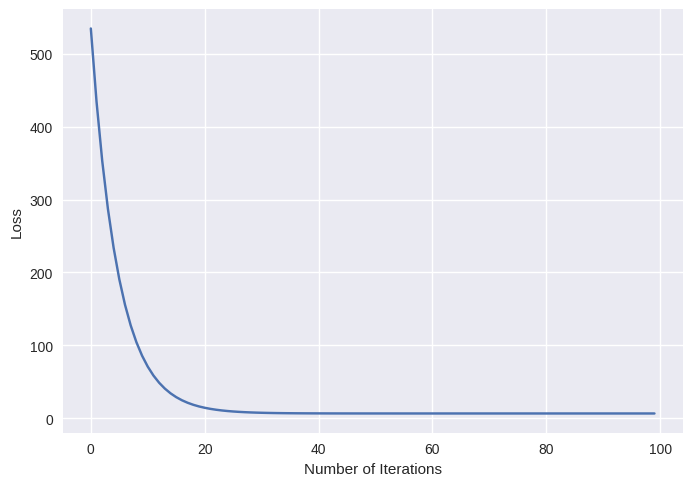

In [45]:
theta = train(X,y)

In [46]:
def predict(X,theta):
  return hypothesis(X,theta)


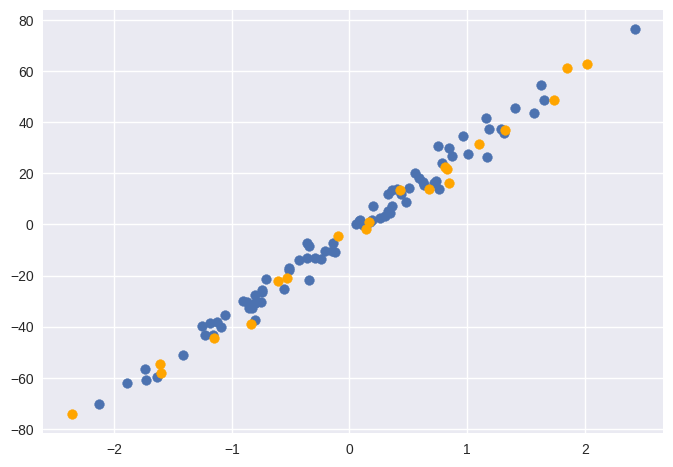

In [47]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color="orange")
plt.show()

In [48]:
yp = predict(Xt,theta)

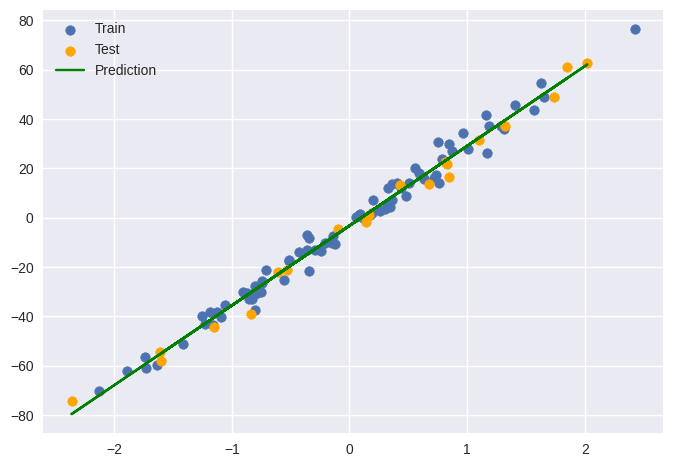

In [49]:
plt.scatter(XT,yT,label="Train")
plt.scatter(Xt,yt,color="orange",label="Test")
plt.plot(Xt,yp,color="green",label="Prediction")
plt.legend()
plt.show()

In [50]:
# Model Evaluation
def r2Score(y,yp):
  ymean = y.mean()
  num = np.sum((y-yp)**2)
  denom = np.sum((y-ymean)**2)

  return 1- num/denom

r2Score(yt,yp)

# r2 score lies between 0 to 1 -> 1 ->means 100% accuracy and 0 means 0% accuracy in layman language

0.9906222346037542

In [51]:
# Visualising the training process
